In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="darkgrid")

# Set style and increase font sizes
sns.set(style="darkgrid", font_scale=1.5)  # Increase overall font scale
plt.rcParams.update({'font.size': 14,       # Base font size
                     'axes.titlesize': 18,   # Title font size
                     'axes.labelsize': 16,   # Axis label size
                     'xtick.labelsize': 14,  # x-tick label size
                     'ytick.labelsize': 14,  # y-tick label size
                     'legend.fontsize': 14}) # Legend font size

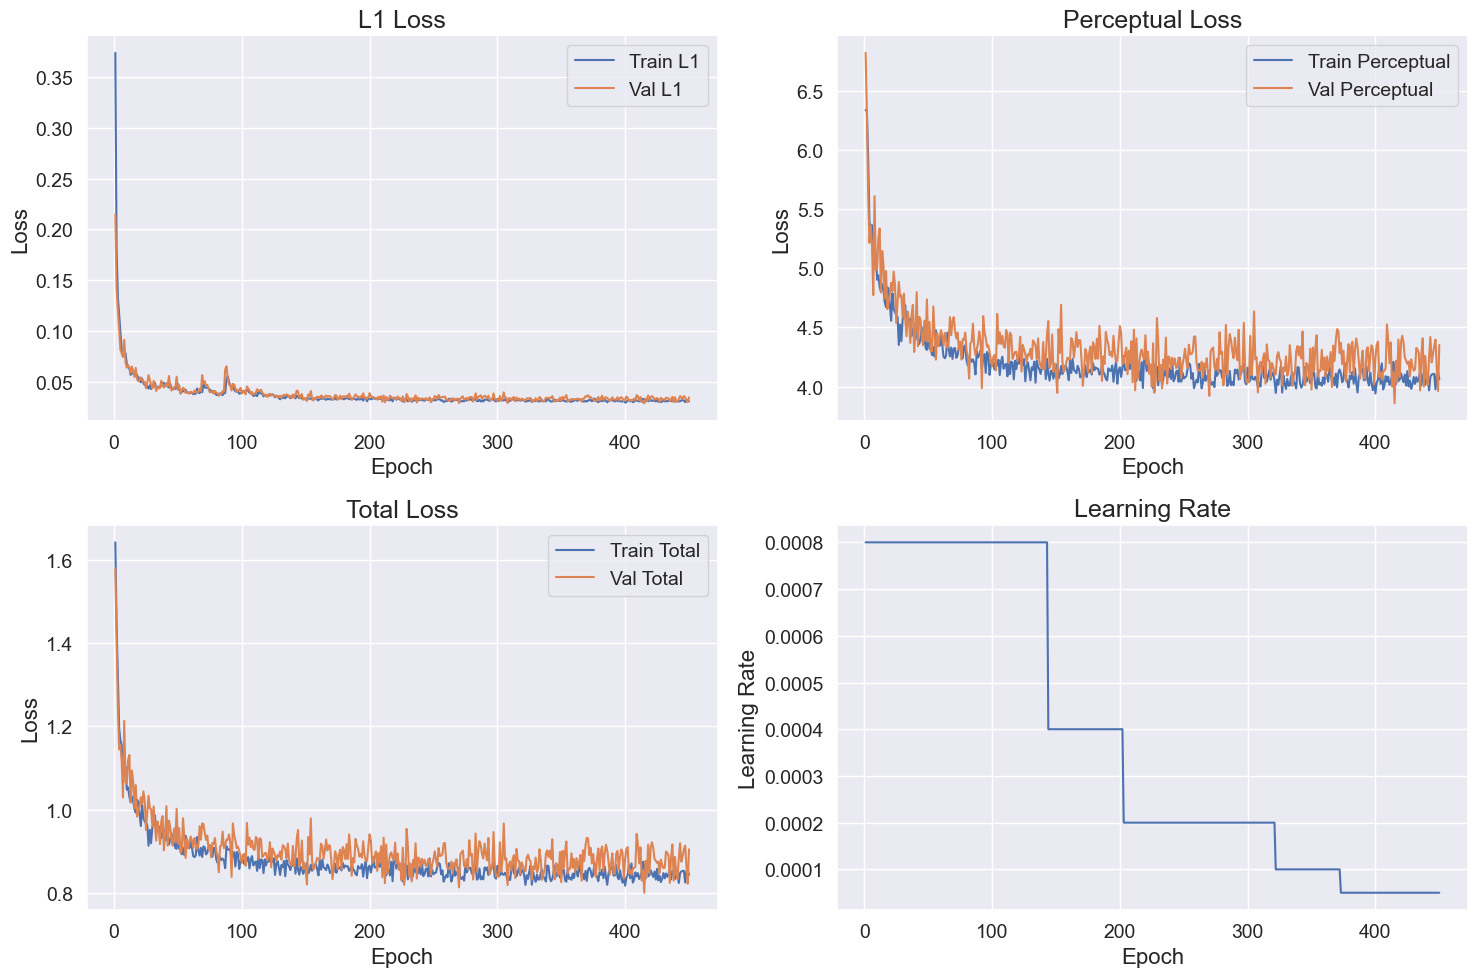

In [6]:
# Load the CSV data
df = pd.read_csv('loss_log.csv')

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: L1 losses (train vs val)
sns.lineplot(x='epoch', y='train_l1', data=df, label='Train L1', ax=axes[0, 0])
sns.lineplot(x='epoch', y='val_l1', data=df, label='Val L1', ax=axes[0, 0])
axes[0, 0].set_title('L1 Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')

# Plot 2: Perceptual losses (train vs val)
sns.lineplot(x='epoch', y='train_perc', data=df, label='Train Perceptual', ax=axes[0, 1])
sns.lineplot(x='epoch', y='val_perc', data=df, label='Val Perceptual', ax=axes[0, 1])
axes[0, 1].set_title('Perceptual Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')

# Plot 3: Total losses (train vs val)
sns.lineplot(x='epoch', y='train_total', data=df, label='Train Total', ax=axes[1, 0])
sns.lineplot(x='epoch', y='val_total', data=df, label='Val Total', ax=axes[1, 0])
axes[1, 0].set_title('Total Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

# Plot 4: Learning rate
sns.lineplot(x='epoch', y='learning_rate', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Learning Rate')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Learning Rate')

# Adjust layout
plt.tight_layout()
plt.savefig('training_metrics.png', dpi=300)
plt.show() 

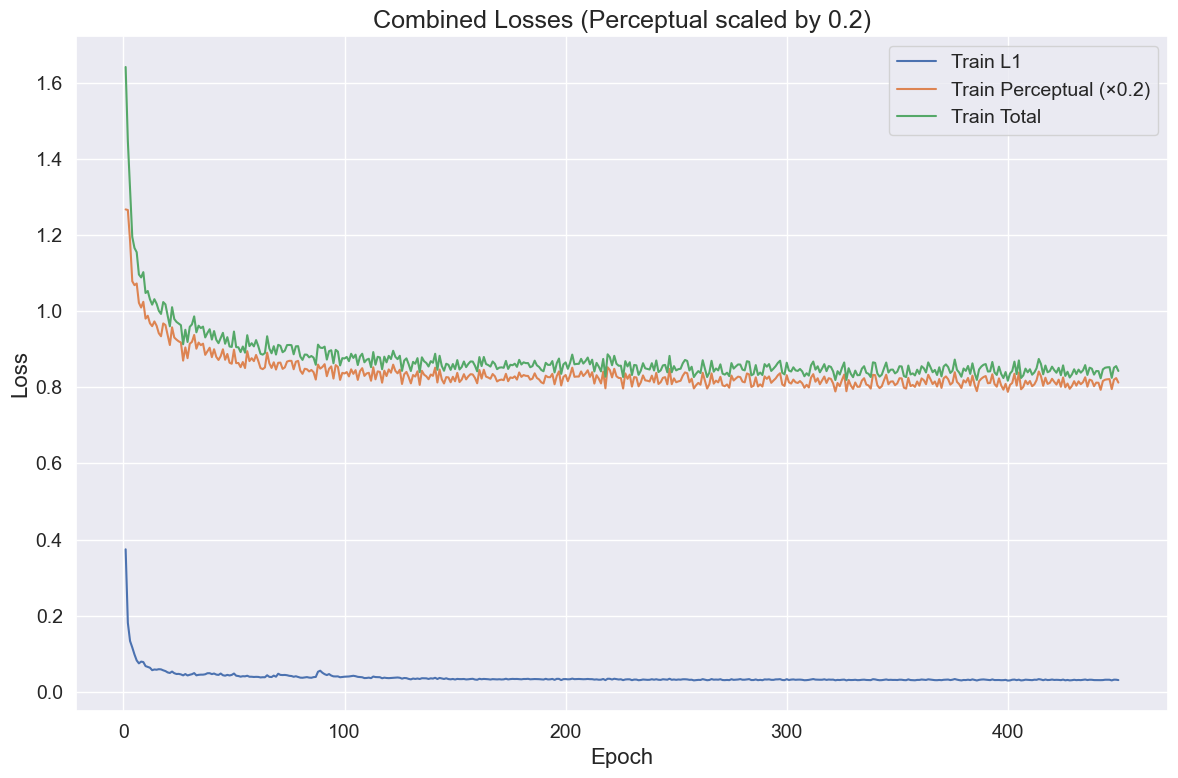

In [7]:
# Create a new dataframe with scaled perceptual losses (multiplied by 0.2)
df_scaled = df.copy()
df_scaled['train_perc'] = df_scaled['train_perc'] * 0.2
df_scaled['val_perc'] = df_scaled['val_perc'] * 0.2

# Create a new figure for the combined plot
plt.figure(figsize=(12, 8))

# Plot all losses on one graph
sns.lineplot(x='epoch', y='train_l1', data=df, label='Train L1')
sns.lineplot(x='epoch', y='train_perc', data=df_scaled, label='Train Perceptual (×0.2)')
sns.lineplot(x='epoch', y='train_total', data=df, label='Train Total')

plt.title('Combined Losses (Perceptual scaled by 0.2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('combined_losses.png', dpi=300)
plt.show()